In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import scipy.integrate as integr

Exact   integral: 2.0
Approx integral1: 2.603940611613528
Approx integral2: 2.000019223414473


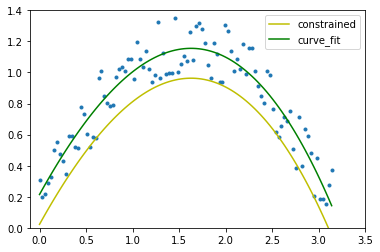

In [7]:
x = np.linspace(0, np.pi, 100)
y = np.sin(x) + (0. + np.random.rand(len(x))*0.4)
params=np.ones(4)
def Func(x,*argv):
    a=[]
    for arg in argv: a=np.append(a,arg)
    iv=np.arange(len(a))
    return np.sum([a[i]*x**i for i in iv],axis=0)
    #return a0 + a1*x + a2*x**2 + a3*x**3

# modified function definition with Penalization
def FuncPen(x, *argv):
    a=[]
    for arg in argv: a=np.append(a,arg)
    iv=np.arange(len(a))
    integral = integr.quad( Func, 0, np.pi, args=a)[0]
    penalty = abs(2.-integral)*10000
    return np.sum([a[i]*x**i for i in iv],axis=0) + penalty


popt1, pcov1 = opt.curve_fit( Func, x, y,p0=params)
popt2, pcov2 = opt.curve_fit( FuncPen, x, y,p0=params)

y_fit1 = Func(x, *popt1)
y_fit2 = Func(x, *popt2)

plt.scatter(x,y, marker='.')
plt.plot(x,y_fit2, color='y', label='constrained')
plt.plot(x,y_fit1, color='g', label='curve_fit')
plt.legend(); plt.xlim(-0.1,3.5); plt.ylim(0,1.4)
print('Exact   integral: {}'.format(integr.quad(np.sin ,0,np.pi)[0]))
print('Approx integral1: {}'.format(integr.quad(Func,0,np.pi,args=(popt1[0],popt1[1],
                                                popt1[2],popt1[3]))[0]))
print('Approx integral2: {}'.format(integr.quad(Func,0,np.pi,args=(popt2[0],popt2[1],
                                                popt2[2],popt2[3]))[0]))
plt.show()